# Practical 3: Transfer Learning

This is the second task of Practical 3. You will use transfer learning to build a convolutional neural network to tackle the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
You could select an existing trained model (VGG16 excluded) from Keras (https://keras.io/api/applications/) and fine-tune it to solve the classification problem of CIFAR-10. 

We will mark your code based on the accuracy of your model. You should try to get **at least 80%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
tf.keras.__version__

'2.2.4-tf'

## Prepare the dataset

In this block, you will prepare the data for the training, such as apply the preprocess function of your selected model and perform data augmentation. 

In [4]:
from keras.datasets import cifar10
from tensorflow.keras.applications.vgg19 import preprocess_input
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

X_train_full = preprocess_input(X_train_full)
X_test = preprocess_input(X_test)
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10) 

Using TensorFlow backend.


In [5]:
np.random.seed(2)
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]
print(y_train.shape)

(45000, 10)


## Build and train the model

Build and train your model. 

In [6]:
# TODO: load the model you selected
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input
# TODO: Transfer learning - build your own model based on the selected model

In [9]:
base_model=VGG19(input_shape=(32,32,3), weights='imagenet', include_top=False)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)
base_model.summary()

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
___________________________________________________________

In [10]:
x = base_model.layers[-6].output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(rate=0.2)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(rate=0.2)(x)
out_put = keras.layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=base_model.input, outputs=out_put)

# freeze the layers from Vgg19 
for layer in base_model.layers[:14]:
    layer.trainable=False

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 23s 507us/sample - loss: 1.0272 - accuracy: 0.6516 - val_loss: 2.4008 - val_accuracy: 0.6260
Epoch 2/30
45000/45000 [==============================] - 19s 430us/sample - loss: 0.7197 - accuracy: 0.7548 - val_loss: 7.5036 - val_accuracy: 0.7468
Epoch 3/30
45000/45000 [==============================] - 20s 434us/sample - loss: 0.6160 - accuracy: 0.7902 - val_loss: 0.9953 - val_accuracy: 0.7480
Epoch 4/30
23328/45000 [==============>...............] - ETA: 8s - loss: 0.5398 - accuracy: 0.8152

In [55]:
# show the structure of your model
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

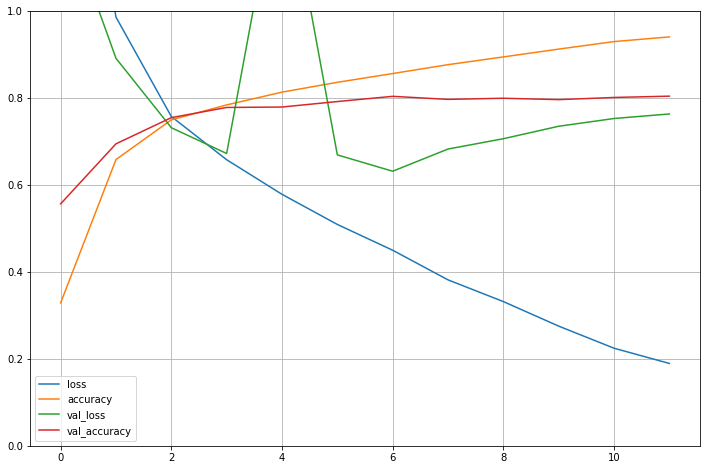

In [56]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [57]:
model.save('cifar10.h5') 

## Load the model and evaluate it on the test data

In [60]:
model = keras.models.load_model("cifar10.h5")
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 338us/sample - loss: 0.6483 - accuracy: 0.8014


[0.6482957528114319, 0.8014]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as how you decide the number of layers reused from the selected model, and the difficulties you met.

As for tranfoe learning, firstly I try to deal with it as the examples, which add flatten layers and dense layers. But this way can't meet the requirements, so I try to release the parameters of some layers and then trained it. At last it succeed. 
The biggest difficulty is which model to choose, which takes me several days. Then it's decide how many layers to release, too many or too few will not meet the requirement